micrograd -> tiny autograd (automatic gradient)

In [3]:
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

scalar valued function example

RECALL -> def of derivative:
f(x+h)-f(x)/h

In [4]:
def f(x):
    return 2*x**2 + 4*x + 16

In [5]:
f(1)

22

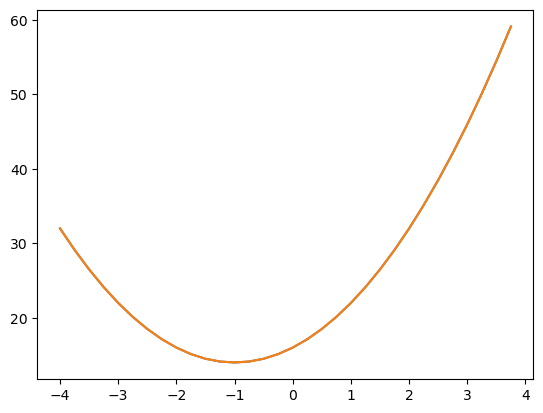

In [9]:
xs = np.arange(-4, 4, 0.25)
ys = f(xs)
plt.plot(xs, ys)
plt.show()

In [10]:
# more complex
a = 2.0
b = -3.0
c = 10.0
d = a*b+c
print(d)

4.0


In [14]:
h = 0.0001

# inputs
a = 2.0
b = -3.0
c = 10.0

d1 = a*b+c
c += h 
d2 = a*b+c

print(f'd1: {d1}, d2: {d2}')
print('slope: ', (d2 - d1)/h)


d1: 4.0, d2: 4.0001
slope:  0.9999999999976694


In [49]:
# skeleton taken from https://github.com/karpathy/micrograd

class Value:

    def __init__(self, data, _children=(), _op = '', label=''):
        self.data = data
        self.grad = 0.0
        self._prev = set(_children) # tuple to set for efficiency
        self._op = _op
        self.label = label

    def __repr__(self):
        return f"Value(data={self.data})"
    
    def __add__(self, other):
        out = Value(self.data + other.data, (self, other), '+')
        return out

    def __mul__(self, other):
        out = Value(self.data * other.data, (self, other), '*')
        return out
    
a = Value(2.0, label='a')
b = Value(-3.0, label='b')
c = Value(10.0, label='c')
e = a*b; e.label='e'
d = e + c; d.label='d'
f = Value(-2.0, label='f')
L = f * d; L.label = 'L'

In [50]:
from graphviz import Digraph

def trace(root):
    nodes, edges = set(), set()
    def build(v):
        if v not in nodes:
            nodes.add(v)
            for child in v._prev:
                edges.add((child, v))
                build(child)
    build(root)
    return nodes, edges

def draw_dot(root):
    dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'})
    nodes, edges = trace(root)
    for n in nodes:
        uid = str(id(n))
        dot.node(name=uid, label="{ %s | data %.4f | grad %.4f }" % (n.label, n.data, n.grad), shape="record")
        if n._op:
            dot.node(name=uid + n._op, label=n._op)
            dot.edge(uid + n._op, uid)
    
    for n1, n2 in edges:
        dot.edge(str(id(n1)), str(id(n2)) + n2._op)
    
    return dot


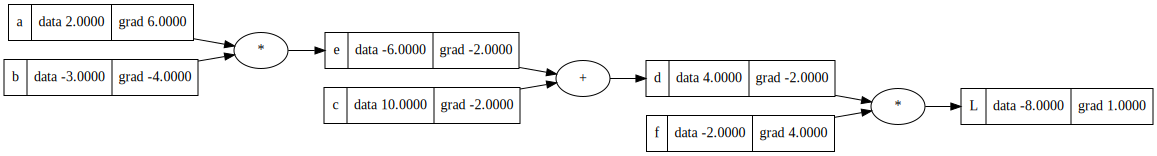

In [64]:
draw_dot(L)

In [61]:
# TODO: dL / dc -> recall chain rule dL / dc = dL / dd * dd / dc
# lets first look at dd/ dc -> this is just 1.0 by symmetry we get
# dd / dc = 1.0, dd / de = 1.0
# dL = dc = -2.0 * 1.0
c.grad = -2.0
e.grad = -2.0

In [63]:
# lets do for a and b, de / da = -3.0, de / db = 2.0
# dL / da -> dL / de * de / da = -2.0 * -3.0 = 6.0
# dL / db -> dL / de * de / db = -2.0 * 2.0 = -4.0

a.grad = 6.0
b.grad = -4.0

In [55]:
# L = d * f 
# dL/dd = ? -> f
# proof with f(x+h) - f(x) / h

f.grad = 4.0
d.grad = -2.0



In [53]:
L.grad = 1.0

In [66]:
# In order to increase L, we nee d to go in the direction of the gradient
a.data += 0.01 * a.grad
b.data += 0.01 * b.grad
c.data += 0.01 * c.grad
f.data += 0.01 * f.grad

e = a * b
d = e + c
L = d * f

print(L.data)

-6.586368000000001


In [60]:
def lol():

    h = 0.0001

    a = Value(2.0, label='a')
    b = Value(-3.0, label='b')
    c = Value(10.0, label='c')
    e = a*b; e.label='e'
    d = e + c; d.label='d'
    f = Value(-2.0, label='f')
    L = f * d; L.label = 'L' 
    L1 = L.data

    a = Value(2.0, label='a')
    b = Value(-3.0, label='b')
    c = Value(10.0, label='c')
    e = a*b; e.label='e'
    d = e + c; d.label='d'
    d.data += h
    f = Value(-2.0, label='f')
    L = f * d; L.label = 'L'
    L2 = L.data

    print((L2-L1)/h)
lol()

-1.9999999999953388
